In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk("./"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# 1. Frame the problem
Using the customer description, Define the problem your trying to solve in your own words (remember this is not technial but must be specific so the customer understands the project

After the events of the titanic, data about the passangers which unfortunately became victims of the accident were released, including (of course over 100 years later) whether or not they survived. This data can be utilized in order to predict the survivability of these passengers or a test passenger using known data about said passenger. This prediction model can be used to further determine what would be key in finding out what is most significant in a person's survival in this extreme circumstance.

# 2. Get the Data 
Define how you recieved the data (provided, gathered..)

In [14]:
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

The data was provided by Kaggle.com and their titanic ML competition, which contains two main csv files, with the main difference between the training and testing files in whether or not they included the "Survived" column. Both files contain information about the passengers, ranging from age, to sex, to amount of relatives or social class.

In [15]:
df = pd.read_csv('data/titanic.csv')

# 3. Explore the Data
Gain insights into the data you have from step 2, making sure to identify any bias

It seems that some bias exists, starting with the fact that richer people, women, and children may have survived more often than other groups, which may make our model prioritize those groups when deciding survivability. I will try and test on Sex, Age, and Social Class features.

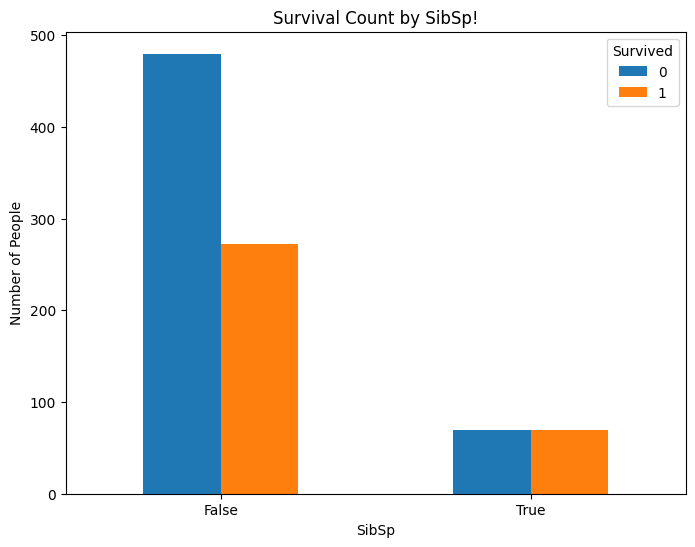

In [16]:
survival_count = df.groupby([df['Age']<=18, 'Survived']).size().unstack(fill_value=0)


survival_count.plot(kind='bar', stacked=False, figsize=(8, 6))
plt.xlabel('SibSp')
plt.ylabel('Number of People')
plt.title('Survival Count by SibSp!')
plt.xticks(rotation=0)


plt.show()

# 4.Prepare the Data


Apply any data transformations and explain what and why


I will map sex to 0 for male and 1 for female because computers do not use names. I will also start training by moving the three features into sets.

In [33]:
X = df[['Sex', 'Age', 'Fare']].copy()
y = df['Survived']

X_clean = X.dropna().copy()
y_clean = y.loc[X_clean.index]

sex_mapping = {'male': 0, 'female': 1}
X_clean.loc[:, 'Sex'] = X_clean['Sex'].map(sex_mapping)

X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.4, random_state=42)

# 5. Model the data
Using selected ML models, experment with your choices and describe your findings. Finish by selecting a Model to continue with
Decision Tree, cause I thought of it first and it seems to do well with categorical variables like these.

Using this model, I tested with this template, trying different combinations of classifiers to see which model had the highest accuracy.

In [34]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# calculate accuracy
test_accuracy = accuracy_score(y_test, model.predict(X_test))
print(f"Test Accuracy: {test_accuracy:.3f}")

# feature importance
feature_names = ['Sex', 'Age', 'Fare']
importances = model.feature_importances_

print("\nFeature Importance:")
for name, importance in zip(feature_names, importances):
    print(f"{name}: {importance:.3f}")

Test Accuracy: 0.731

Feature Importance:
Sex: 0.340
Age: 0.303
Fare: 0.357


# 6. Fine Tune the Model

With the select model descibe the steps taken to acheve the best rusults possiable 


1. Collect data from csv file
2. Filter through data to see patterns
3. Note the variables with the largest effect on the results, Age, Fare, Sex
4. Create a copy of the data
5. Create a training set of the data and begin training the model to make the decision tree
6. Add or change data features to increase accuracy.

# 7. Present
In a customer faceing Document provide summery of finding and detail approach taken


The analysis of Titanic passenger data revealed that gender, fare, and age were the key factors influencing survival. Women and children—particularly those in first and second class—had significantly higher survival rates than men in third class. I tested the decision tree model on this, and after research can see that it is somewhat accurate, though perhaps utilizing another model or perhaps adjusting parameters more could lead to a better outcome.

# 8. Launch the Model System
Define your production run code, This should be self susficent and require only your model pramaters 


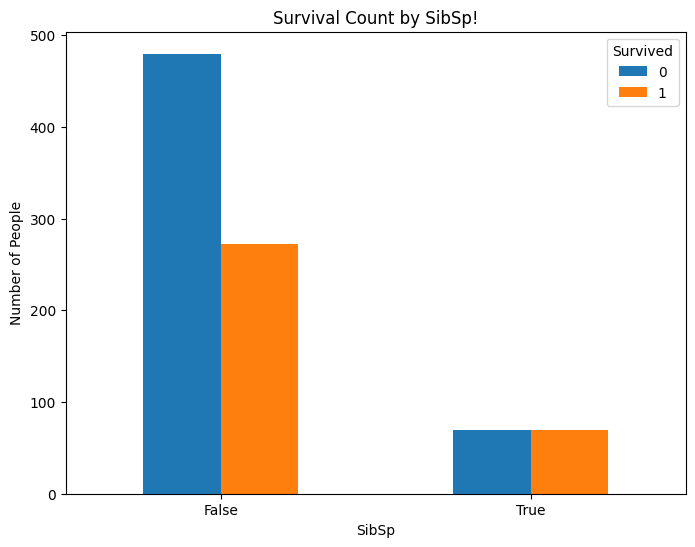

Test Accuracy: 0.731

Feature Importance:
Sex: 0.340
Age: 0.303
Fare: 0.357


In [37]:
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

def titanic_test():

    df = pd.read_csv('data/titanic.csv')
    survival_count = df.groupby([df['Age']<=18, 'Survived']).size().unstack(fill_value=0)

    
    survival_count.plot(kind='bar', stacked=False, figsize=(8, 6))
    plt.xlabel('SibSp')
    plt.ylabel('Number of People')
    plt.title('Survival Count by SibSp!')
    plt.xticks(rotation=0)
    
    
    plt.show()
    X = df[['Sex', 'Age', 'Fare']].copy()
    y = df['Survived']
    
    X_clean = X.dropna().copy()
    y_clean = y.loc[X_clean.index]
    
    sex_mapping = {'male': 0, 'female': 1}
    X_clean.loc[:, 'Sex'] = X_clean['Sex'].map(sex_mapping)
    
    X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.4, random_state=42)
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)
    
    # calculate accuracy
    test_accuracy = accuracy_score(y_test, model.predict(X_test))
    print(f"Test Accuracy: {test_accuracy:.3f}")
    
    # feature importance
    feature_names = ['Sex', 'Age', 'Fare']
    importances = model.feature_importances_
    
    print("\nFeature Importance:")
    for name, importance in zip(feature_names, importances):
        print(f"{name}: {importance:.3f}")

titanic_test()